# Lending Club EDA - An Intuitive Approach

## Introduction

Lending Club is the world's largest peer-to-peer lending platform. They offers lending service by connecting the borrowers with investors through an online marketplace. While this has became a popular source of passive income for investors, there is also risk of default, in which the borrowers fall behind on their repayments. In this kernel, we will perform some explorations and feature analysis on the loan data provided by Lending Club to identify the potential *risk factors* associated with a loan default. The analyses will answer the following questions:

**1. What are the distributions of loan?**  
**2. What are the correlation between the variables?**  
**3. What are the characteristics of good and bad borrowers?**  
**5. Which factors influence the loan repayment and default rate?**

## Getting Started

The first thing we'll need to do is to import the required libraries and take a quick look at the data.

### Importing the libraries

In [1]:
import pandas as pd
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt  
import math
from math import pi
import numpy as np
import seaborn as sns
np.seterr(divide='ignore', invalid='ignore')
%matplotlib inline 

### Understanding the data

The data file contain complete loan data for all loans issued through the 2007-2015, including the borrower profile, current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of roughly 890 thousand observations and 75 variables.

### Overview

In [2]:
# Load data
loan_df = pd.read_csv('loan.csv',header=0,skip_blank_lines=True)

# Get the first 5 rows of the data
loan_df.head()

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


List of columns and their data types

In [3]:
# Print information of the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

### Handling missing values

There are columns that contain a lot of missing date. We need to remove these columns as they are not putting any significant value to the analysis. Here we drop columns with more than 80% of `NaN` value. 

In [4]:
# Drop columns with more than 80% of missing values
na_thresh = len(loan_df)*80/100
loan_df = loan_df.dropna(thresh=na_thresh, axis=1)

# Check the new dimension
loan_df.shape

(887379, 52)

The resultant dataset has 52 columns.

## Loan Distribution 

Let's start by looking at the distribution of the loans, e.g. What are the changes of number of loan issued over time? What is the distribution of the loan amount applied by borrowers? The variables that will be included in this section are:

- **issue_d** : The month which the loan was funded.
- **loan_amnt** : The listed amount of the loan applied for by the borrower.
- **addr_state** : The state provided by the borrower in the loan application.
- **purpose** : Reason of the loan request.
- **loan_status** : Current status of the loan.

**Loan Distribution by *Year* and *Amount***

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



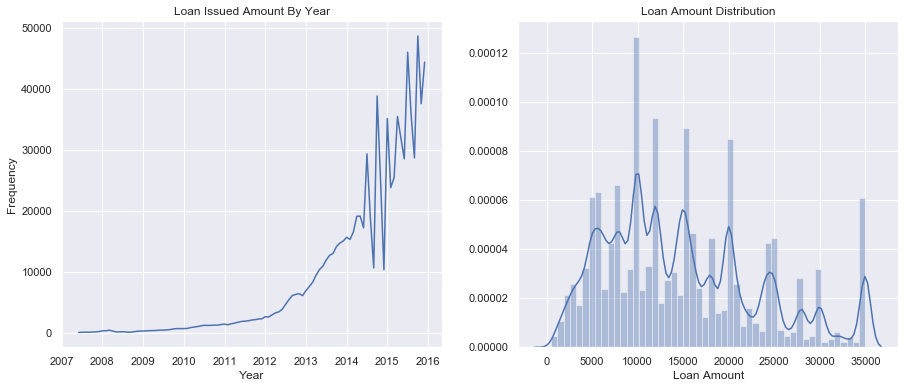

In [5]:
# Convert 'issue_d' column to datetime format
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'])
year_dist = loan_df.groupby(['issue_d']).size()

plt.figure(figsize=(15,6))
sns.set()

ax1 = plt.subplot(1, 2, 1)
ax1 = year_dist.plot()
ax1 = plt.title('Loan Issued Amount By Year')
ax1 = plt.xlabel('Year')
ax1 = plt.ylabel('Frequency')

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.distplot(loan_df['loan_amnt'])
ax2 = plt.title('Loan Amount Distribution')
ax2 = plt.xlabel('Loan Amount')

>- The time series plot on the left shows a rising popularity of loan lending after 2011. The trend becomes unstable but continue to grow after the year of 2014.
- The distribution of loan amount is slightly skewed to the right. Most borrowers applied loan of around $10,000.

**Loan Distribution by *Region* and *Purpose***

Next we'll break the loans down by region and loan purpose to examine their distributions. We can divide up the loans into 4 US regions (Northeast, Midwest, West, South) from the 'addr_state' column which indicates the state where the loan was issued.

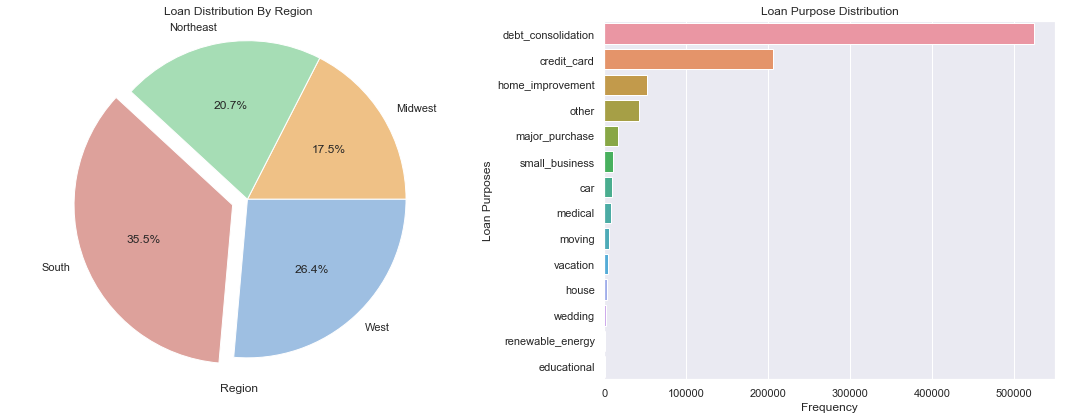

In [6]:
# Create a region dictionary from US regions dateset
regions = pd.read_csv('regions.csv',header=0,skip_blank_lines=True)
regions_dict = pd.Series(regions['region'].values,index=regions['state']).to_dict()

# Create a new column 'region' by mapping the state value to region from the region dict
loan_df['region'] = loan_df['addr_state'].map(regions_dict)

region_dist = loan_df.groupby(['region']).size()
explode = (0, 0, 0.1, 0) 
colors = ["#efc186","#a6ddb5","#dda19b","#9ebfe2"]
plt.figure(figsize=(15,6))
ax1 = plt.subplot(1, 2, 1)
ax1 = plt.pie(region_dist,autopct='%1.1f%%',explode=explode, labels=region_dist.index,colors = colors)
ax1 = plt.title('Loan Distribution By Region')
ax1 = plt.xlabel('Region')
ax1 = plt.axis('equal')  

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.countplot(y=loan_df['purpose'],order = loan_df['purpose'].value_counts().index)
ax2 = plt.title('Loan Purpose Distribution')
ax2 = plt.ylabel('Loan Purposes')
ax2 = plt.xlabel('Frequency')
ax2 = plt.tight_layout()

>- *South* region has the highest amount of loan while *midwest* region has the lowest.
- The most common reason of a loan request is *debt consolidation*, followed by *credit card* and *home improvement*.

**Loan Distribution by Status**

Below are the definitions of each loan status:
1. **Issued**: New loan that has passed all LendingClub reviews, received full funding, and has been issued.
2. **Current**: Loan is up to date on all outstanding payments. 
3. **In Grace Period**: Loan is past due but within the 15-day grace period. 
4. **Late (16-30)**: Loan has not been current for 16 to 30 days.
5. **Late (31-120)**: Loan has not been current for 31 to 120 days. 
6. **Fully paid**: Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.
7. **Default**: Loan has not been current for an extended period of time. 
8. **Charged Off**: Loan for which there is no longer a reasonable expectation of further payments. Upon Charge Off, the remaining principal balance of the Note is deducted from the account balance. 

More status definition : [LendingClub](https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-)

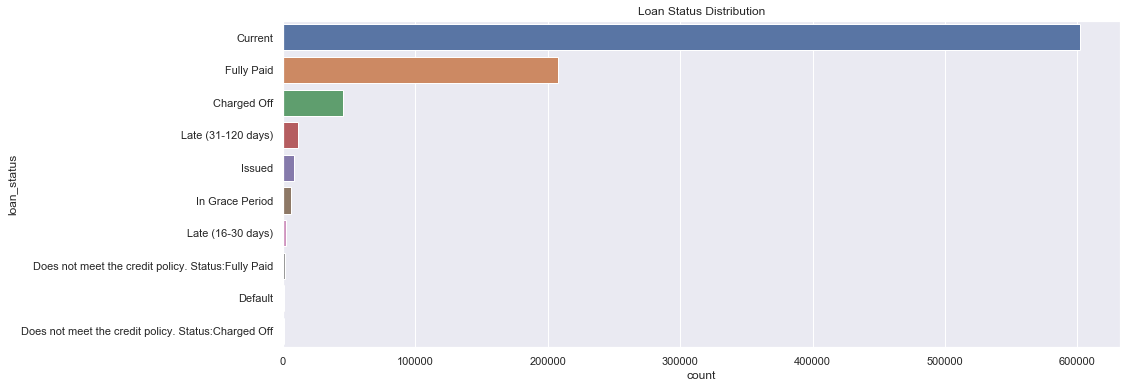

In [7]:
plt.figure(figsize=(15,6))
ax = sns.countplot(y=loan_df['loan_status'],order = loan_df['loan_status'].value_counts().index)
ax = plt.title('Loan Status Distribution')

>Most of the loan are performing well here, but there is also a number of borrowers who have failed to repay by the payment deadline.

## Relationship between variables

In this section, we want to gain better understanding of the basic relationship between the features that we have previously seen.

We notice that some statuses are having similar definition which may introduce redundancy to the data. We need to do some standardization on the status label.

In [8]:
# Create a new status dictionary
new_status_dict = {
    'Fully Paid': 'Fully Paid',
    'Charged Off': 'Charged Off',
    'Current': 'Current',
    'Default': 'Default',
    'Late (31-120 days)': 'Late',
    'In Grace Period': 'Late',
    'Late (16-30 days)': 'Late',
    'Does not meet the credit policy. Status:Fully Paid': 'Fully Paid',
    'Does not meet the credit policy. Status:Charged Off': 'Charged Off',
    'Issued': 'Issued'
}

loan_df['new_status'] = loan_df['loan_status'].map(new_status_dict)
pd.Series(pd.unique(loan_df['new_status'])).to_frame()

,0
0,Fully Paid
1,Charged Off
2,Current
3,Default
4,Late
5,Issued


**Distribution of Loan Amount Across The Year by Loan Status**

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



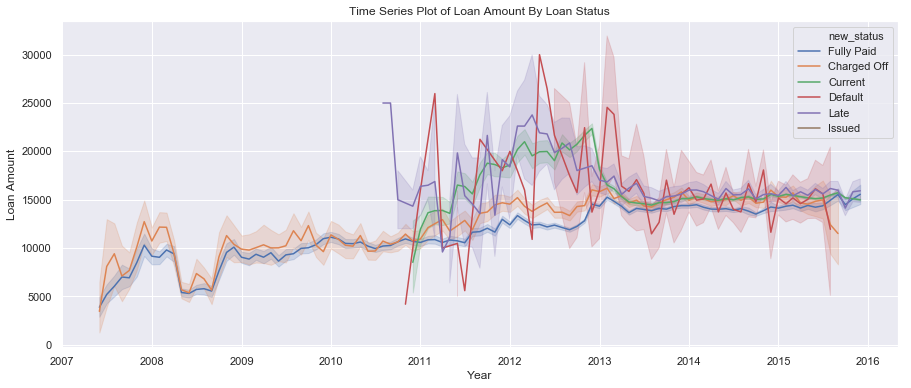

In [9]:
plt.figure(figsize=(15,6))

ax = sns.lineplot(x="issue_d", y="loan_amnt",hue="new_status", data=loan_df)
ax = plt.title('Time Series Plot of Loan Amount By Loan Status')
ax = plt.xlabel('Year')
ax = plt.ylabel('Loan Amount')

>As observed, *Default*, *Late* and *Current* loans have a higher loan amount in average than loans with other statuses from 2011 and 2013. This give us some idea about the relationship between loan amount and loan status. From 2013 onwards, the loan amount applied tends to stabilized at around $15,000. 

**Amount of Loan Issued Across The Year By Region**

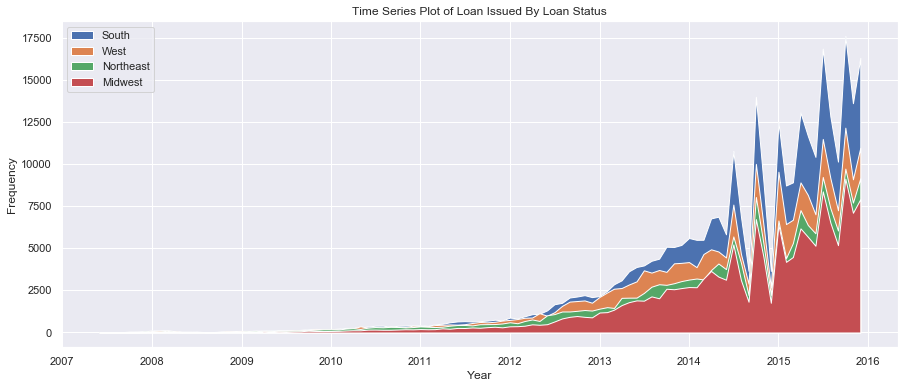

In [10]:
plt.figure(figsize=(15,6))

region_freq = loan_df.groupby(['region','issue_d']).size().unstack().fillna(0)
dates = np.sort(pd.unique(loan_df['issue_d']))

ax = plt.fill_between(dates,region_freq.values[2],label='South')
ax = plt.fill_between(dates,region_freq.values[3],label='West')
ax = plt.fill_between(dates,region_freq.values[1],label='Northeast')
ax = plt.fill_between(dates,region_freq.values[0],label='Midwest')

ax = plt.legend(loc='upper left')
ax = plt.xlabel('Year')
ax = plt.ylabel('Frequency')
ax = plt.title('Time Series Plot of Loan Issued By Loan Status')

>The distribution trends of different regions are very similar.

**Loan Amount Versus Region**

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



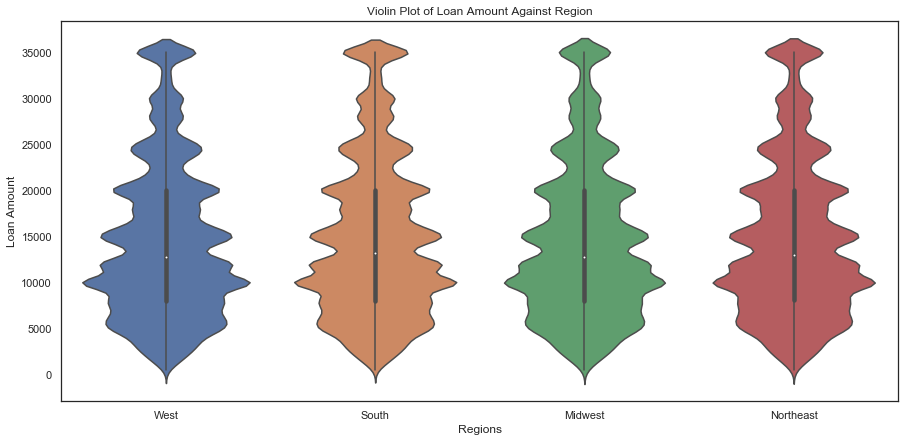

In [41]:
plt.figure(figsize=(15,7))

ax = sns.violinplot(x="region", y="loan_amnt", data=loan_df)
ax = plt.xlabel('Regions')
ax = plt.ylabel('Loan Amount')
ax = plt.title('Violin Plot of Loan Amount Against Region')

>Again, there appears a lot of similarity in the probability density of loan amount across different region. So we can infer that that is hardly any relationship between region and loan amount.

**Loan Amount Versus Purpose**

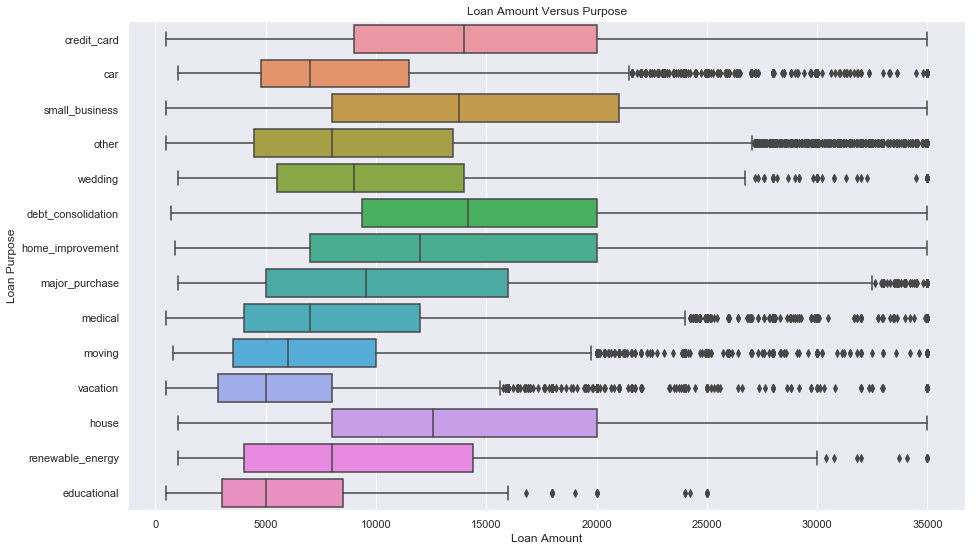

In [12]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(y="purpose", x="loan_amnt", data=loan_df)
ax = plt.xlabel('Loan Amount')
ax = plt.ylabel('Loan Purpose')
ax = plt.title('Loan Amount Versus Purpose')

>The top purposes with the highest loan amount are *credit card*, *small business*, *debt consolidation*, *home improvement* and *house*. 

**Purpose Versus Region By Frequency**

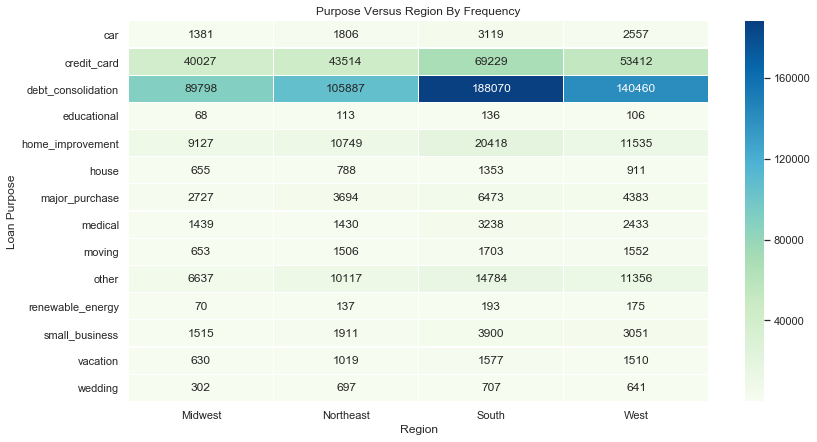

In [13]:
plt.figure(figsize=(13,7))
plot_data = loan_df.groupby(['purpose','region']).size().reset_index()
plot_data.columns = ['purpose','region','value']
plot_data = plot_data.pivot('purpose','region','value')

ax = sns.heatmap(plot_data,annot=True, fmt="d",cmap="GnBu",linewidths=.2)
ax = plt.xlabel('Region')
ax = plt.ylabel('Loan Purpose')
ax = plt.title('Purpose Versus Region By Frequency')

## Characteristics of good and bad borrowers

Now that we have gained some understanding in the dataset, let's go down further to see if we can explore anything else that is insightful. 

Remember that all loan comes with risks: default and delinquency. Before granting approval for any loan request, we want to know whether the he/she will keep his/her promise and repay the loan on time based on their profile. Note that a past due loan is not equivalent to a default loan, but it is at high risk becoming one. We don't want that to happen either.

To get some clues on what might be the factors that affect the loan in the future, we need to first study the relationship between the features and loan type (we will catagorize the loan into *Good* and *Bad* category). Below are the additional features that we may want to look at:
- **annual_inc** : Annual income of borrower.
- **emp_length** : Employment length in years.
- **grade** : Loan grade
- **home_ownership** : Home ownership status of the borrower.
- **int_rate** : Interest rate on the loan.


In [14]:
# Here we exclude newly issued loan as they don't give any significant insight 
loan_df = loan_df[loan_df['loan_status'] != 'Issued']

# Categorize loan into 'Good' or 'Bad'
# Create dictionary that map loan status to loan type
loan_type_dict = {
    'Fully Paid': 'Good',
    'Charged Off': 'Bad',
    'Current': 'Good',
    'Default': 'Bad',
    'Late (31-120 days)': 'Bad',
    'In Grace Period': 'Bad',
    'Late (16-30 days)': 'Bad',
    'Does not meet the credit policy. Status:Fully Paid': 'Good',
    'Does not meet the credit policy. Status:Charged Off': 'Bad'
}

loan_df['loan_type'] = loan_df['loan_status'].map(loan_type_dict)

**Loan Type Distribution**

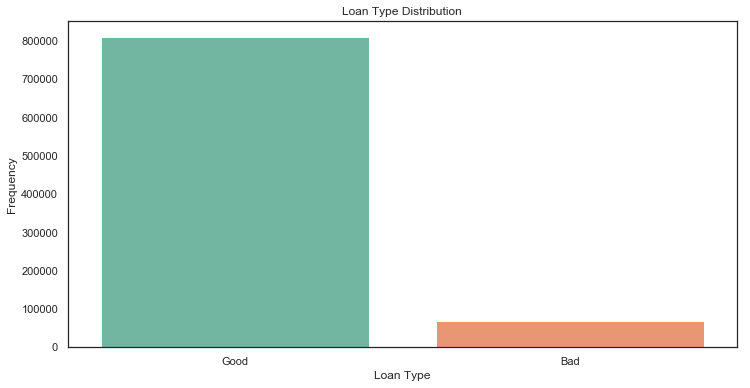

In [45]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="loan_type", data=loan_df,palette="Set2")
ax = plt.xlabel('Loan Type')
ax = plt.ylabel('Frequency')
ax = plt.title('Loan Type Distribution')

>The dataset is highly imbalanced where the number of good loan is much higher than the bad loan. (This may not seem to be a huge problem now but it will surely lead to performance degradation when it comes to modeling.)

**Loan Amount**

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



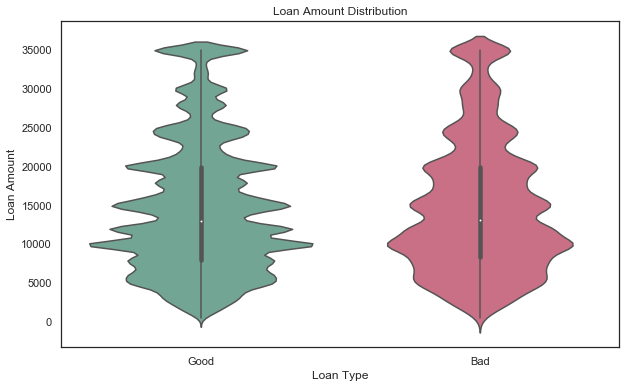

In [46]:
plt.figure(figsize=(10,6))

pal = {"Good": "#6bad97", "Bad": "#d8617f"}

ax = sns.violinplot(x="loan_type", y="loan_amnt", data=loan_df,palette=pal)
ax = plt.xlabel('Loan Type')
ax = plt.ylabel('Loan Amount')
ax = plt.title('Loan Amount Distribution')

**Region**

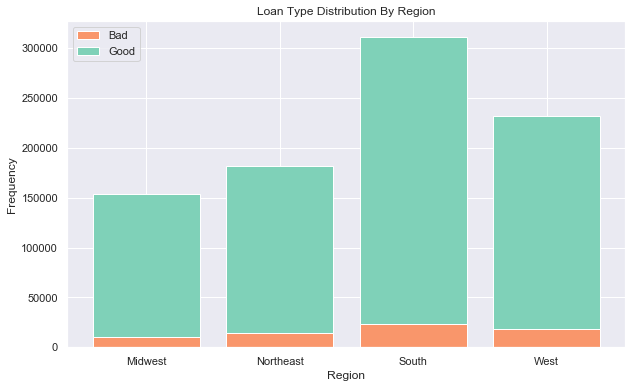

In [17]:
plt.figure(figsize=(10,6))
plot_data = loan_df.groupby(['region','loan_type']).size().unstack().T
r = range(4)

ax = plt.bar(r, plot_data.values[0], color='#f9966b', edgecolor='white',label='Bad')

ax = plt.bar(r, plot_data.values[1], bottom=plot_data.values[0], color='#7fd1b8', edgecolor='white',label='Good')
names = plot_data.columns
ax = plt.xticks(r, names)
ax = plt.legend(loc='upper left')
ax = plt.xlabel('Region')
ax = plt.ylabel('Frequency')
ax = plt.title('Loan Type Distribution By Region')

>The distributions of the loan types across different regions are very similar.

**Annual Income**

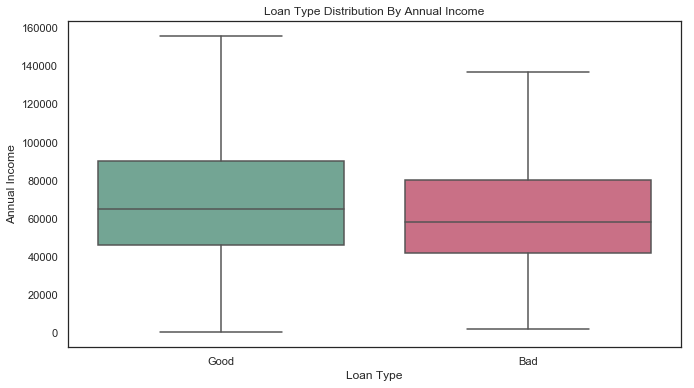

In [50]:
plt.figure(figsize=(11,6))

ax = sns.boxplot(x="loan_type", y="annual_inc",  data=loan_df,showfliers=False,palette=pal)
ax = plt.xlabel('Loan Type')
ax = plt.ylabel('Annual Income')
ax = plt.title('Loan Type Distribution By Annual Income')

>Borrowers who have higher annual income are more likely to pay off the loan on time.

**Employment Length**

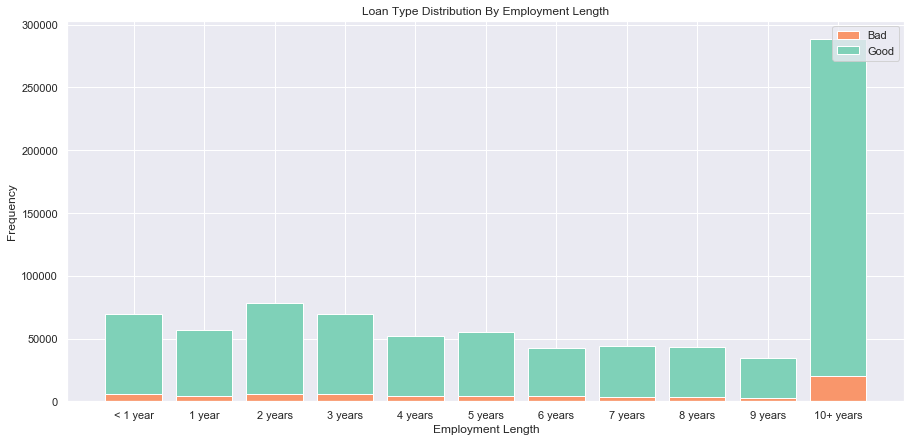

In [19]:
plt.figure(figsize=(15,7))
plot_data = loan_df.groupby(['emp_length','loan_type']).size().unstack().T
cols = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
plot_data = plot_data[cols]
r = range(11)

ax = plt.bar(r, plot_data.values[0], color='#f9966b', edgecolor='white',label='Bad')

ax = plt.bar(r, plot_data.values[1], bottom=plot_data.values[0], color='#7fd1b8', edgecolor='white',label='Good')
names = plot_data.columns
ax = plt.xticks(r, names)
ax = plt.legend(loc='upper right')
ax = plt.xlabel('Employment Length')
ax = plt.ylabel('Frequency')
ax = plt.title('Loan Type Distribution By Employment Length')

>Borrowers who work more than 10 years makes up a large proportion of the borrower population. Despite that, the percentage of them defaulting on a loan is very low as compared to borrowers who work less than 10 years. One possible reason behind this is that people from this group generally earns a higher income.

**Loan Purposes**

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



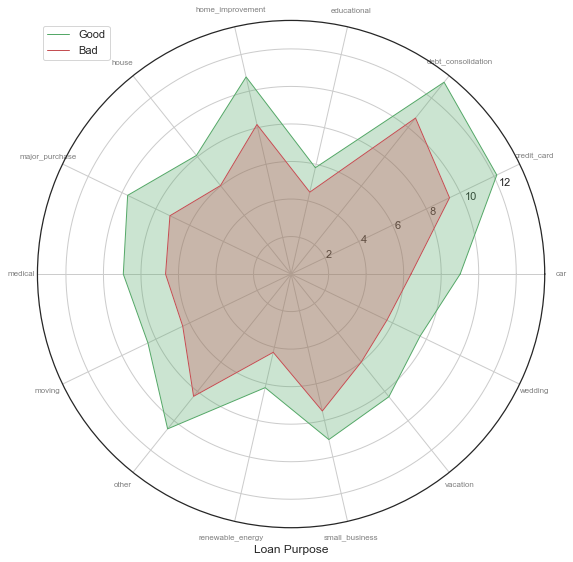

In [61]:
plt.figure(figsize=(20,10))
plot_data = loan_df.groupby(['loan_type','purpose']).size().reset_index()
plot_data.columns = ['loan_type','purpose','value']

# Apply logarithm to the frequency value to reduce skewness
plot_data['value'] = plot_data['value'].apply(math.log)

# Retrieve good loans
good_loan = plot_data[plot_data['loan_type'] == 'Good']

# Retrieve bad loans
bad_loan = plot_data[plot_data['loan_type'] == 'Bad']

N = len(pd.unique(good_loan['purpose']))
good_values = good_loan.value.values
good_values = np.append(good_values, [good_values[:1]])

bad_values = bad_loan.value.values
bad_values = np.append(bad_values, [bad_values[:1]])

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(1,2,1, polar=True)
ax = plt.xticks(angles[:-1], pd.unique(good_loan['purpose']), color='grey', size=8)
ax = plt.plot(angles, good_values, linewidth=1, linestyle='solid',label='Good',color='g')
ax = plt.fill(angles, good_values, 'g', alpha=0.3)
ax = plt.xlabel('Loan Purpose')

ax2 = plt.subplot(1, 2, 1,polar=True)
ax2 = plt.xticks(angles[:-1], pd.unique(bad_loan['purpose']), color='grey', size=8)
ax2 = plt.plot(angles, bad_values, linewidth=1, linestyle='solid',label='Bad',color='r')
ax2 = plt.fill(angles, bad_values, 'r', alpha=0.3)
ax2 = plt.xlabel('Loan Purpose')

ax = plt.legend(loc='upper left')

>Loan with the purpose of *Educational* and *small business* has slightly higher chance of becoming a bad loan than any other purposes.

**Home Ownership**

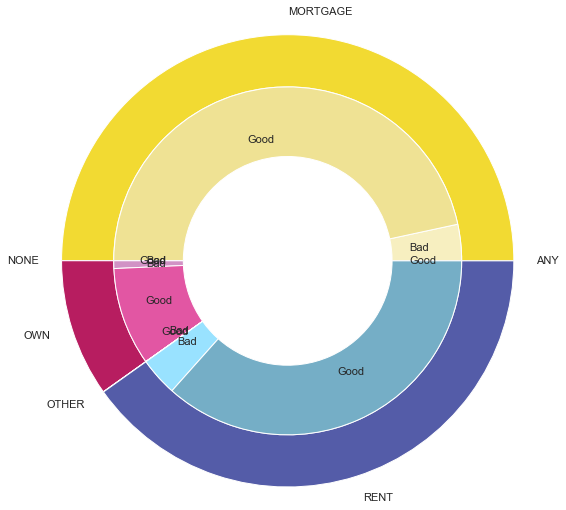

In [63]:
plot_data1 = loan_df.groupby(['home_ownership','loan_type']).size().unstack().fillna(0)
plot_data1['total'] = plot_data1['Bad'] + plot_data1['Good']
cols = ['ANY','MORTGAGE','NONE','OWN','OTHER','RENT']
plot_data1 = plot_data1.reindex(index=cols)

plot_data2 = loan_df.groupby(['home_ownership','loan_type']).size().reset_index().fillna(0)
plot_data2.columns = ['home_ownership', 'loan_type','value']
plot_data2 = plot_data2.reindex([0,1,2,3,4,7,8,5,6,9,10])
plt.figure(figsize=(8,8))
ax = plt.axis('equal')

# Plot the outer circle
mypie, _ = plt.pie(np.array(plot_data1['total']), radius=1.3,labels=plot_data1.index,colors=['#13194c','#f2da32','#2fb74d','#b71d60','#91683a','#545ca8'])
ax = plt.setp(mypie, width=0.3, edgecolor='white')
 
# Plot the inner circle
mypie2, _ = plt.pie(plot_data2.value.values, radius=1.3-0.3, labels=plot_data2['loan_type'].values, labeldistance=0.7,
                   colors = ['#91683a','#f7efc0','#efe294','#b7ba3f','#b7ba3f','#d192c5','#e256a3','#b7ba3f','#b7ba3f','#99e2ff','#75aec6'])
ax = plt.setp(mypie2, width=0.4, edgecolor='white')
ax = plt.margins(0,0)


>As depicted in the doughnut plot, majority of the borrowers have *mortgage* house, followed by *rent* and *own* house. However, borrowers who rent a house are more likely to delinquent on a loan than those who has a mortgage house.

**Loan Grade**

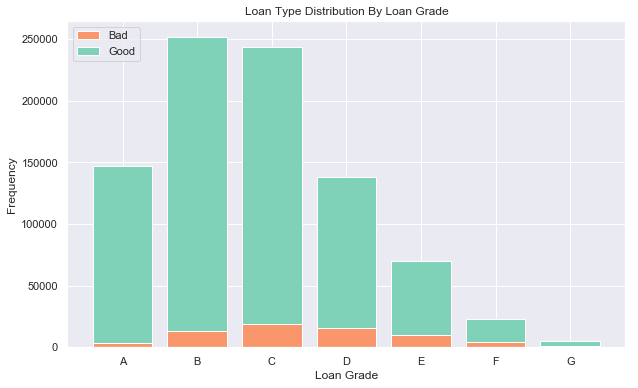

In [22]:
plt.figure(figsize=(10,6))
plot_data = loan_df.groupby(['grade','loan_type']).size().unstack().T
r = range(7)

ax = plt.bar(r, plot_data.values[0], color='#f9966b', edgecolor='white',label='Bad')
ax = plt.bar(r, plot_data.values[1], bottom=plot_data.values[0], color='#7fd1b8', edgecolor='white',label='Good')
names = plot_data.columns
ax = plt.xticks(r, names)
ax = plt.legend(loc='upper left')
ax = plt.xlabel('Loan Grade')
ax = plt.ylabel('Frequency')
ax = plt.title('Loan Type Distribution By Loan Grade')

>Loans are graded based on borrowers' credit scores. The grade with the highest frequency is grade B. However, grade C loans has higher likehood of being a bad loan.

**Interest Rate**

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



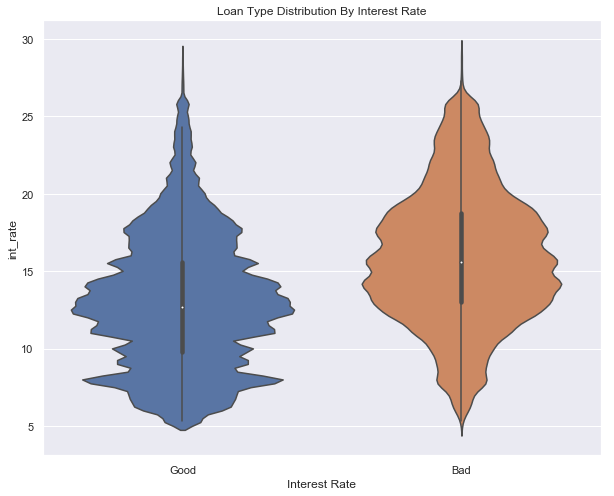

In [23]:
plt.figure(figsize=(10,8))
ax = sns.violinplot(y="int_rate", x="loan_type", data=loan_df)
ax = plt.xlabel('Loan Type')
ax = plt.title('Loan Type Distribution By Interest Rate')

>A loan is more likely to end up as a bad loan when the interest rate is higher.

## Any dependencies?

From the above analysis, we know that **annual income** and **interest rate** could be used to determine the likelihood of a loan becoming a bad loan to a substantial degree. But we may also want to find out whether they will be affected by changes in other variables.


**Interest Rate Versus Loan Amount**

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



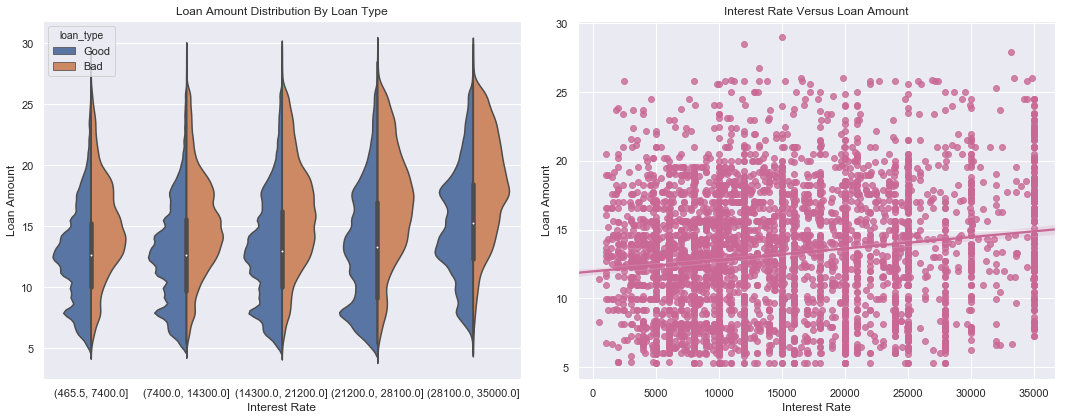

In [24]:
plt.figure(figsize=(15,6))
ax1 = plt.subplot(1, 2, 1)
plot_data = loan_df
plot_data['cut'] = pd.cut(plot_data['loan_amnt'],5)
ax = sns.violinplot(x="cut", y="int_rate", hue="loan_type",data=plot_data,split=True)
ax = plt.ylabel('Interest Rate')
ax = plt.xlabel('Loan Amount')
ax = plt.title('Loan Amount Distribution By Loan Type')

ax2 = plt.subplot(1, 2, 2)
plot_data = loan_df.sample(frac=0.005)
ax2 = sns.regplot(x="loan_amnt", y="int_rate", data=plot_data,color='#c96895')
ax2 = plt.tight_layout()
ax = plt.ylabel('Interest Rate')
ax = plt.xlabel('Loan Amount')
ax = plt.title('Interest Rate Versus Loan Amount')

>The interest rate increases when the loan amount goes up. The increment are small but we can see there is a positive correlation between them.

**Interest Rate Versus Loan Grade**

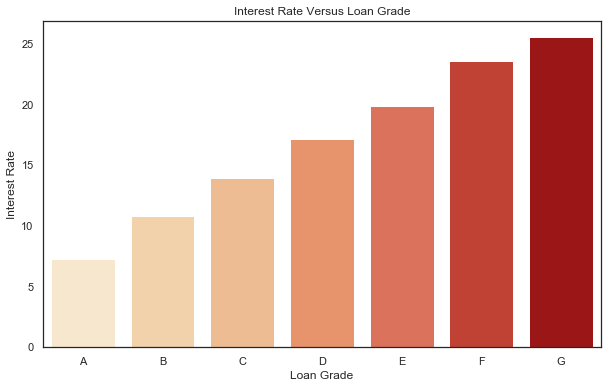

In [64]:
plt.figure(figsize=(10,6))
plot_data = loan_df.groupby('grade')['int_rate'].mean()
ax = sns.barplot(x=plot_data.index,y=plot_data.values,palette='OrRd')
ax = plt.xlabel('Loan Grade')
ax = plt.ylabel('Interest Rate')
ax = plt.title('Interest Rate Versus Loan Grade')

>The average interest rate is higher when the grade is lower.

**Interest Rate Versus Purposes**

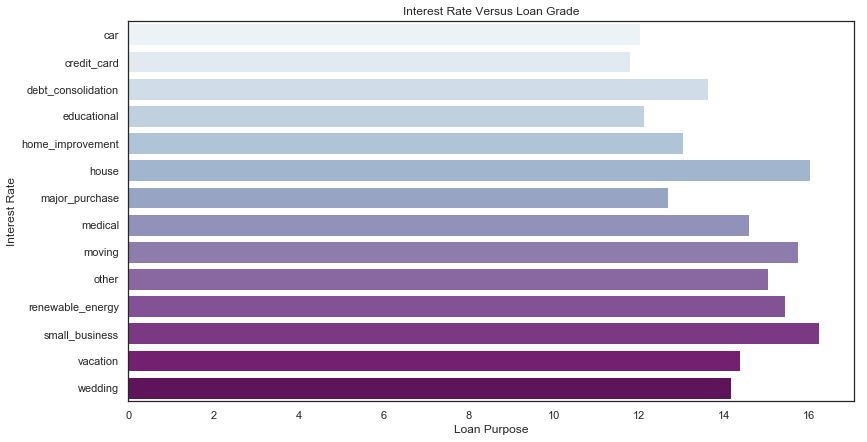

In [66]:
plt.figure(figsize=(13,7))
plot_data = loan_df.groupby('purpose')['int_rate'].mean()
ax = sns.barplot(y=plot_data.index,x=plot_data.values,palette='BuPu')
ax = plt.ylabel('Loan Purpose')
ax = plt.xlabel('Interest Rate')
ax = plt.title('Interest Rate Versus Loan Grade')

>Loans with purposes of *small business*, *house* and *moving* have the highest interest rate.

**Interest Rate Versus Annual Income**

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



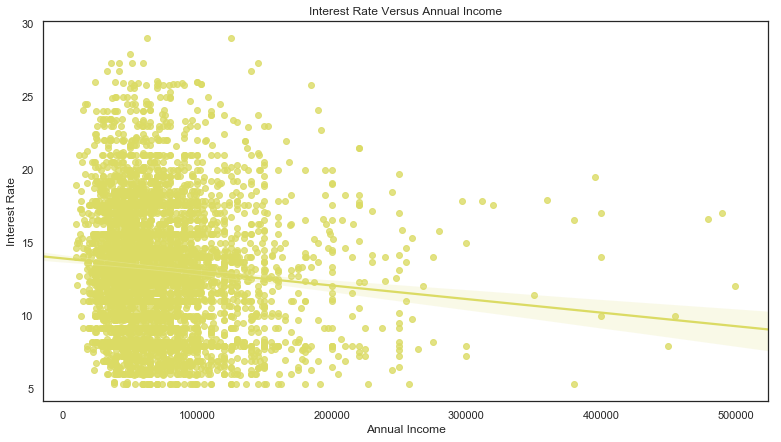

In [27]:
plt.figure(figsize=(13,7))
plot_data = loan_df.sample(frac=0.005,random_state=1)
sns.set_style("white")
ax = sns.regplot(x="annual_inc", y="int_rate", data=plot_data,color='#dbdb64')
ax = plt.xlabel('Annual Income')
ax = plt.ylabel('Interest Rate')
ax = plt.title('Interest Rate Versus Annual Income')

>The correlation between annual income and interest rate is not evident. But it looks like those who earn more annually generally enjoy a lower interest rate for loans.

**Annual Income Versus Employment Length**

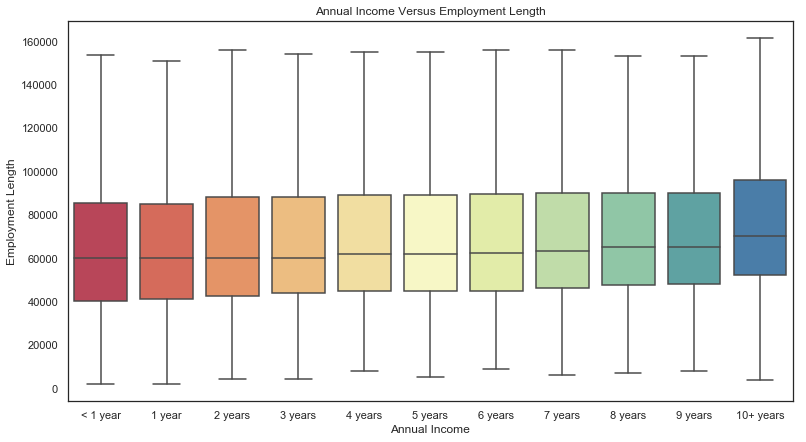

In [28]:
plt.figure(figsize=(13,7))

cols = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

ax = sns.boxplot(x="emp_length", y="annual_inc",  data=loan_df,order=cols,showfliers=False,palette='Spectral')

ax = plt.ylabel('Annual Income')
ax = plt.xlabel('Employment Length')
ax = plt.title('Annual Income Versus Employment Length')

>Unsurprisingly, those who works for longer years get paid more annually.

### Feature Importance Analysis

Using EDA we have learned a lot about the data and its underlying structure. We have also identified some of the few features that show evident correlation with the target variable. Next, let's run a feature importance analysis over the dataset to prove our hypothesis. We will train a random forest classifier which is one of the most popular model used for feature engineering to compute the importance score for each feature. We will then rank the features by their importance scores. This step is vital for modeling as it reduces the dimensions without loss of total information by selecting only the most significant features, thus increasing the model's overall performance.


Some preprocessing steps have to be done before feeding the data into the classifier.

In [36]:
# Create a 'target' column based on 'loan type' column
target_dict = {
    'Good': 0,
    'Bad' : 1
}

loan_df['target'] = loan_df['loan_type'].map(target_dict)

# Create dummy variables for catagorical features (encoding)
dummies_df =pd.get_dummies(loan_df,columns=['term','grade','sub_grade','emp_length','home_ownership','pymnt_plan','purpose','addr_state','initial_list_status','application_type'])
dummies_df.dropna(inplace=True)

# Get input variables
X_df = dummies_df.loc[:, ~(dummies_df.columns.isin(pd.Series(loan_df.select_dtypes(['object']).columns)))]

# Get target variable
y = dummies_df['target'].values

X_df = X_df.loc[:, ~(X_df.columns.isin(['target','id','member_id','cut','issue_d']))]

# Create an input matrix 
X = X_df.values

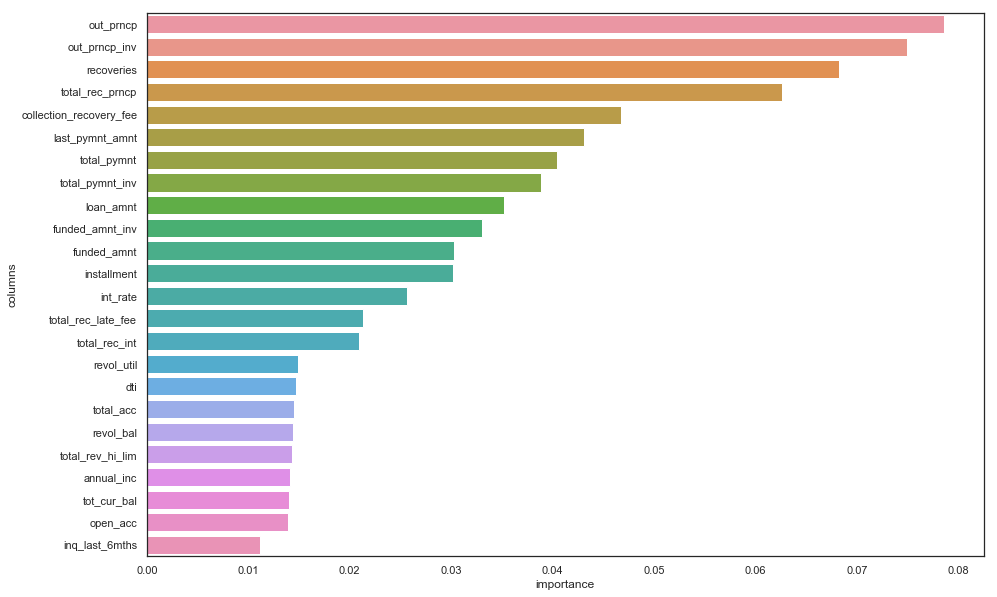

In [39]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Initialize a random forest estimator
forest = ExtraTreesClassifier(n_estimators=50,random_state=0)

# Fit the input matrix and target values to the classifier
forest.fit(X, y)

# Retrieve the computed feature importance
importances = forest.feature_importances_

# Plot the feature importance
plot_data = pd.DataFrame({'features' : pd.Series(X_df.columns),'importance' : pd.Series(importances)})
plt.figure(figsize=(15,10))
plot_data = plot_data.sort_values('importance',ascending=False)
plot_data = plot_data[plot_data['importance'] > 0.01]
ax = sns.barplot(x=plot_data['importance'],y=plot_data['columns'],)

>Above bar plot shows the top 24 features with the highest importance scores. As expected,  **interest rate**, **loan amount** and **annual income** made it to the list with importance scores above 0.01.

**Additional plot: correlation heatmap**

Best way to see a overall picture of the relationships between features is to use a heatmap.

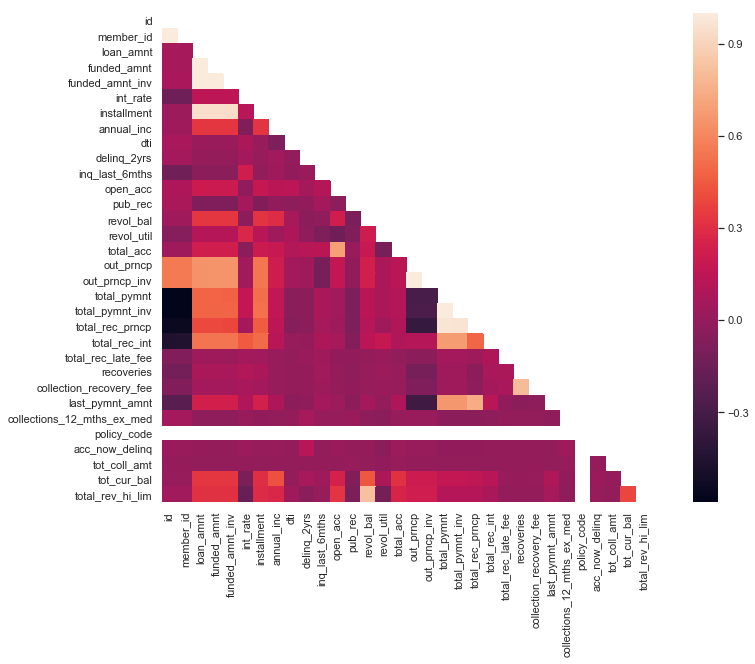

In [732]:
plt.figure(figsize=(15,9))

# Calculate correlation between each pair of variable
corr_matrix=loan_df.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Plot a correlation heatmap
with sns.axes_style("white"):
    ax = sns.heatmap(corr_matrix, mask=mask, square=True)

## To sum it up

Throughout this kernel, we have done some data cleaning on the dataset, analysed some features via graphical representations to uncover correlated variables and tested our assumptions through feature analysis. We managed to discover a few factors that might contribute to the default of loan, eventhough there are still so many other features that have yet to be explored. Nevertheless, these are crucial steps and must be taken prior to building a predictive model as it obtains confidence in the data and helps in refining the selection of features for the model.
